# histograms
with Formula 1 data from https://ergast.com/mrd/db

In [1]:
%autosave 0

from tools import *

f1 = ErgastZIP(ERGAST_ZIP)
plot = Plot()

Autosave disabled


In [2]:
pods = (
    f1.results.loc[lambda df: df['order'].le(3)]
    .join(f1.drivers['driver birthday'.split()], on='id_driver')
    .join(f1.races['date'], on='id_race')
    ['date order driver birthday'.split()]
)
pods['age'] = (pods['date'] - pods.pop('birthday')).dt.days / 365.25

# If co-drivers share a result, then keep the older one.    
pods = (
    pods.sort_values('date order age'.split())
    .drop_duplicates('date order'.split(), keep='last')
    .set_index('date order'.split())
)
pods

driver        age
date       order                            
1950-05-13 1          Nino Farina  43.534565
           2        Luigi Fagioli  51.923340
           3          Reg Parnell  38.863792
1950-05-21 1          Juan Fangio  38.907598
           2       Alberto Ascari  31.854894
...                           ...        ...
2019-11-17 2         Pierre Gasly  23.775496
           3         Carlos Sainz  25.210130
2019-12-01 1       Lewis Hamilton  34.896646
           2       Max Verstappen  22.168378
           3      Charles Leclerc  22.124572

[3054 rows x 2 columns]

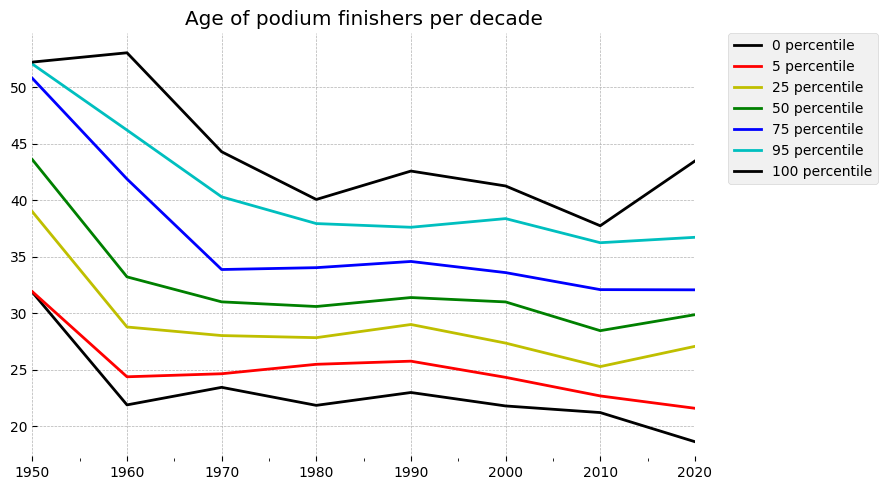

In [3]:
def podquants(**kwargs):
    data = pods.droplevel('order')['age']    
    kwargs.setdefault('title', 'Age of podium finishers per decade')
    plot.quant(data, '10y', **kwargs)
    
podquants()

## all-ages shows

Save /context/data/plots/all-ages_shows.png


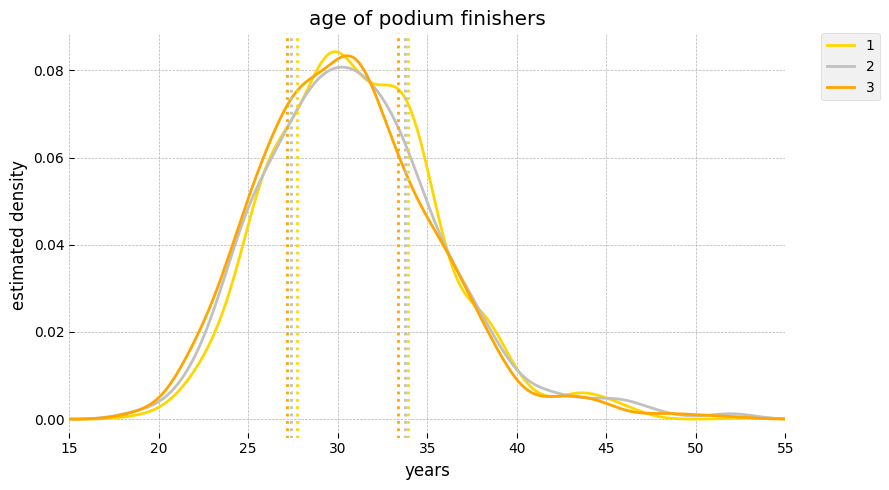

In [4]:
color = 'gold silver orange'.split()
limit = (15, 55)

def density(data, **kwargs):
    kwargs.setdefault('color', color)
    kwargs.setdefault('title', 'age of podium finishers')
    kwargs.setdefault('xlim', limit)
    kwargs.setdefault('xlabel', 'years')
    kwargs.setdefault('ylabel', 'estimated density')
    
    data = data['age'].unstack('order')
    axes = plot.density(data, **kwargs)
    quants = [*data.quantile(.25), *data.quantile(.75)]
    for x, y in zip(quants, [*color, *color]):
        axes.axvline(x, linestyle=":", color=y)
        
    return axes
    
axes = density(pods)
savepng(axes, 'all-ages_shows')

## good old boys

Save /context/data/plots/good_old_boys.png


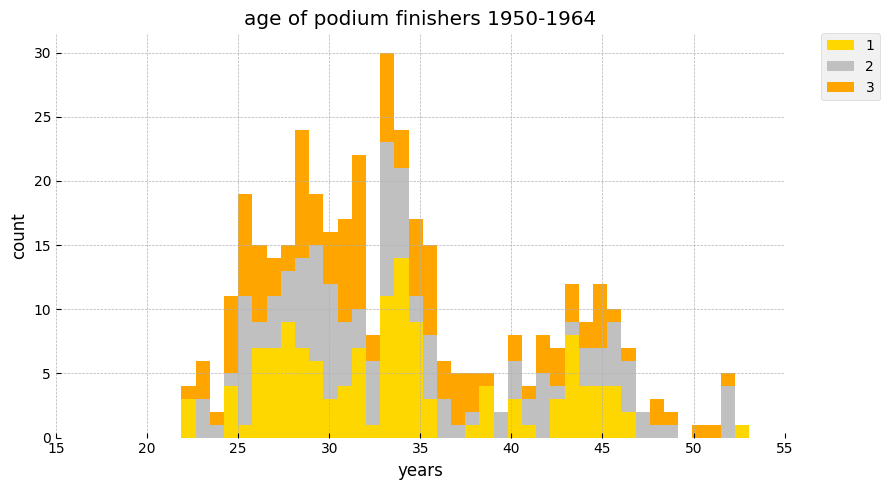

In [5]:
def podhist(data, start, stop, **kwargs):
    kwset = kwargs.setdefault
    kwset('bins', 40)
    kwset('color', color)
    kwset('title', f"age of podium finishers {start}-{stop}")
    kwset('xlim', limit)
    kwset('xlabel', 'years')
    kwset('ylabel', 'count')

    data = data['age'].unstack('order').loc[str(start) : str(stop)]
    #data = pods.pivot(index='date', columns='order', values='age')

    return plot.hist(data, **kwargs)
    
axes = podhist(pods, 1950, 1964)
savepng(axes, 'good_old_boys')

Save /context/data/plots/generation_ickx.png


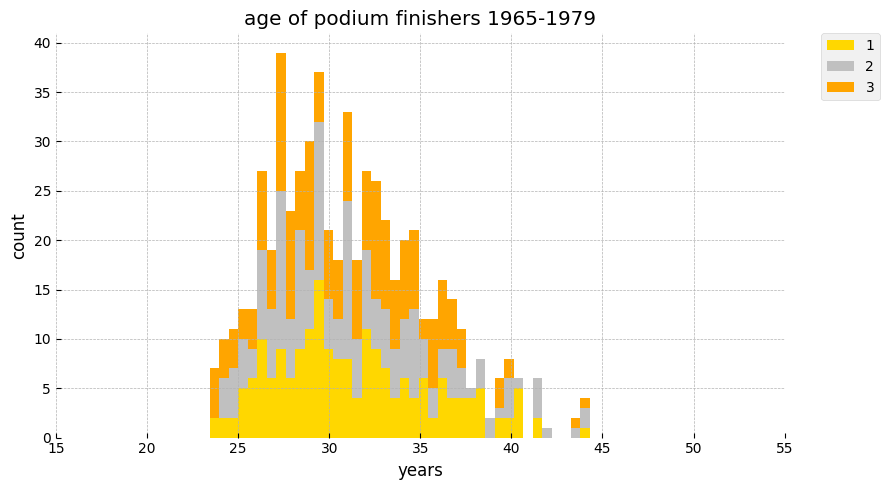

In [6]:
savepng(podhist(pods, 1965, 1979), 'generation_ickx')

Save /context/data/plots/da_silva_foxes.png


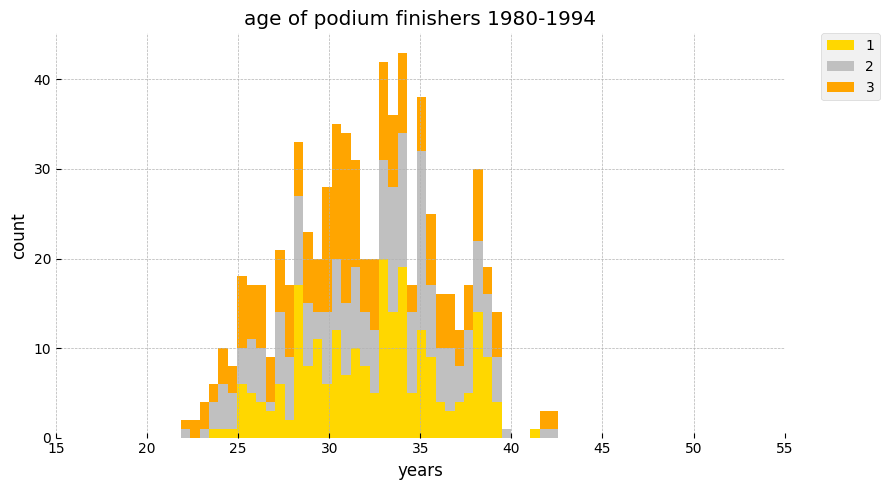

In [7]:
savepng(podhist(pods, 1980, 1994), 'da_silva_foxes')

Save /context/data/plots/centurions.png


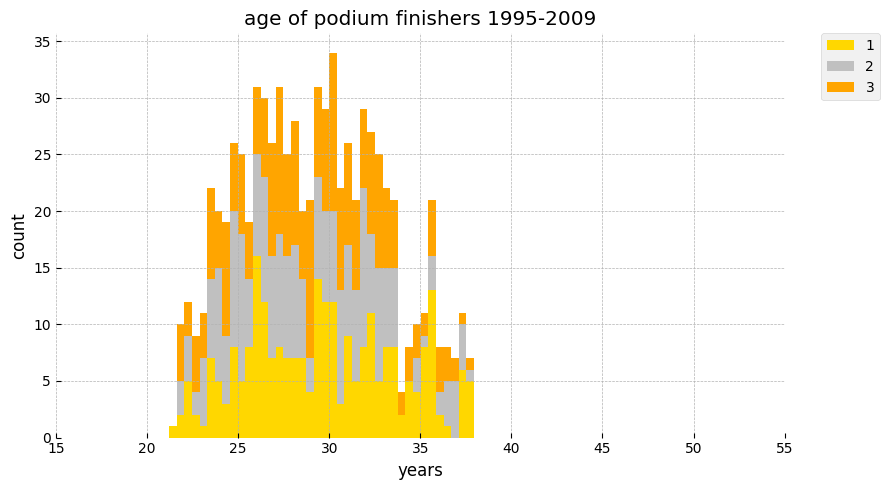

In [8]:
savepng(podhist(pods, 1995, 2009), 'centurions')

Save /context/data/plots/electric_youth.png


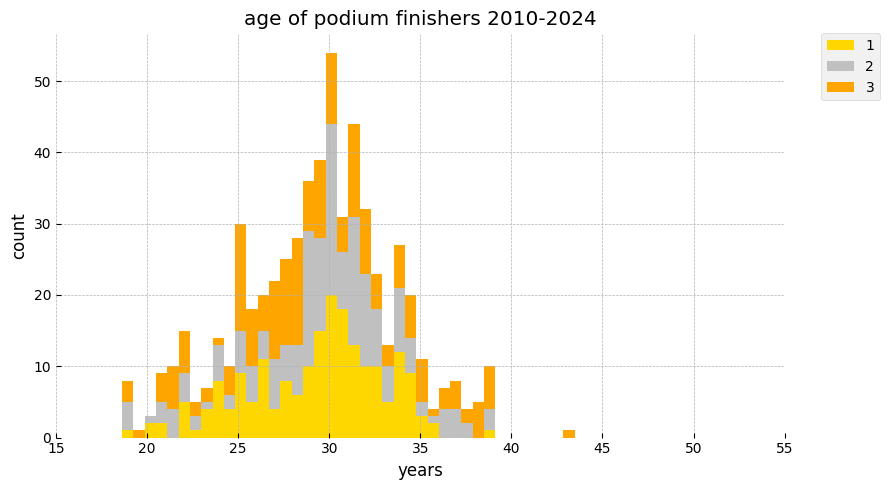

In [9]:
savepng(podhist(pods, 2010, 2024), 'electric_youth')

## over the hills

In [10]:
olds = (
    pods.loc[pods.groupby('driver')['age'].idxmax()]
    .nlargest(10,'age').reset_index(drop=True)
    .sort_index(axis=1).round(3)
)
olds.index += 1
savehtml(olds, 'oldest')
olds

Save /context/data/tables/oldest.html


,age,driver
1,53.057,Luigi Fagioli
2,50.795,Louis Chiron
3,49.996,Felice Bonetto
4,48.914,Piero Taruffi
5,48.597,Nino Farina
6,46.209,Juan Fangio
7,44.830,Karl Kling
8,44.616,Louis Rosier
9,44.329,Luigi Villoresi
10,44.293,Jack Brabham


In [11]:
utes = (
    pods.loc[pods.groupby('driver')['age'].idxmin()]
    .nsmallest(10, 'age').reset_index(drop=True)
    .sort_index(axis=1).round(3)
)
utes.index += 1
savehtml(utes, 'youngest')
utes

Save /context/data/tables/youngest.html


,age,driver
1,18.623,Max Verstappen
2,18.656,Lance Stroll
3,21.202,Sebastian Vettel
4,21.248,Daniil Kvyat
5,21.443,Kevin Magnussen
6,21.454,Charles Leclerc
7,21.648,Fernando Alonso
8,21.758,Robert Kubica
9,21.788,Ralf Schumacher
10,21.840,Elio de Angelis


In [12]:
hills = (
    pods.loc[pods['driver'].str.endswith('Hill')]
    .sort_values('age').drop_duplicates('driver', keep='last')
    .sort_values('age', ascending=False).round(3)
    .reset_index(drop=True).sort_index(axis=1)
)
hills.index += 1
savehtml(hills, 'hills')
hills

Save /context/data/tables/hills.html


,age,driver
1,40.252,Graham Hill
2,37.949,Damon Hill
3,35.159,Phil Hill
